Projekt Vizualizácia
---

Téma: Psy

Skupina Číslo: 10
Skupina Názov: Gormiti

Členovia: Adam Mjartan, Martin Bakus, Norbert Riebesam, Timotej Vida, Michal Salčík

Použité Datasety (linky):

- Hlavný Dataset: https://figshare.com/ndownloader/files/27715521
- Geografické Dáta: https://worldostats.com/country-stats/dog-population-by-country/
- Populačné  Dáta: https://www.kaggle.com/datasets/dataanalyst001/world-population-by-country-2024


Dodatočné Zdroje:



Import Použitých Knižníc

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import geopandas as gpd
import plotly.graph_objects as go
import numpy as np
from IPython.display import Markdown

Načítanie Použitých Datasetov

In [2]:
main_data = pd.read_excel(r'https://figshare.com/ndownloader/files/27715521', sheet_name='Dataset')
dogs = main_data
main_data_information = pd.read_excel(r'https://figshare.com/ndownloader/files/27715521', sheet_name='Information')
population_data = pd.read_csv(r"https://raw.githubusercontent.com/P3rfectS/Data/refs/heads/main/World%20Population%20by%20country%202024.csv")
#geografical_data = pd.read_csv(r"https://raw.githubusercontent.com/P3rfectS/Data/refs/heads/main/Dog%20Population%20by%20Country.csv")
geografical_data = pd.read_csv("Misov Priestor/data/Dog Population by Country.csv")
world_geography = gpd.read_file(r"https://github.com/P3rfectS/Data/raw/refs/heads/main/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

Príprava Vizuálnych Podkladov
---

Príprava: Geografické Dáta
---

#1 transofmácia, čistenie a doplnenie datasetu

In [3]:
#Odstránenie chybných dát
geografical_data = geografical_data[geografical_data["Country"] != 'Montenegro']

#Doplnenie chýbajúcich dát (tvorba dočasného df)
#new_row = pd.DataFrame([{"Country": "Australia", "Estimated Dog Population": "6000000"}])

#Pripojenie ku pôvodnému datasetu
#geografical_data = pd.concat([geografical_data, new_row], ignore_index=True)


#Zmena tipu dát na numerické
geografical_data['Estimated Dog Population'] = pd.to_numeric(
    geografical_data['Estimated Dog Population'].str.replace(',', ''),
    errors='coerce'
)

#Úprava názvov štátov v datasete aby zodpovedali názvom ktoré používa funkcia
country_name_fixes = {
    "Swaziland": "Eswatini",
    "Democratic Republic of Congo": "DR Congo",
    "Kosovo": "Kosovo",
    "United States of America": "United States",
    "Czech Republic": "Czechia",
    "United States": "United States of America",
    "Bosnia and Herzegovina": "Bosnia and Herz."
}
geografical_data['Country'] = geografical_data['Country'].replace(country_name_fixes)
population_data['Country'] = population_data['Country'].replace(country_name_fixes)

#2 Tvorba zjednotených tabuľiek

In [4]:
#Tvorba zjednotenej tabulky
full_table = geografical_data.merge(population_data, on='Country', how='left')
full_table['Dog Population per Capita'] = full_table['Estimated Dog Population'] / full_table['Population 2024']
full_table["Area"] = pd.to_numeric(full_table['Area (km2)'].str.replace(r'K', 'e3', regex=True).str.replace(r'M', 'e6', regex=True))
full_table["Dog Population Density"] = full_table["Estimated Dog Population"] / full_table["Area"]
#Tvorba tabuliek pre vizualizácie
merged = world_geography.merge(geografical_data, how='left', left_on='NAME', right_on='Country')
merged["Estimated Dog Population log"] = np.log10(merged["Estimated Dog Population"])
merged_per_capita = world_geography.merge(full_table, how='left', left_on='NAME', right_on='Country')
merged_per_capita["Dog Population Density log"] = np.log10(merged_per_capita["Dog Population Density"])

#3 Tvorba jednotlivých vizualizácií

C:\Users\Legion\AppData\Local\Temp\ipykernel_13412\2291266753.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_yticklabels([f"10^{val:,}" for val in tick_values])


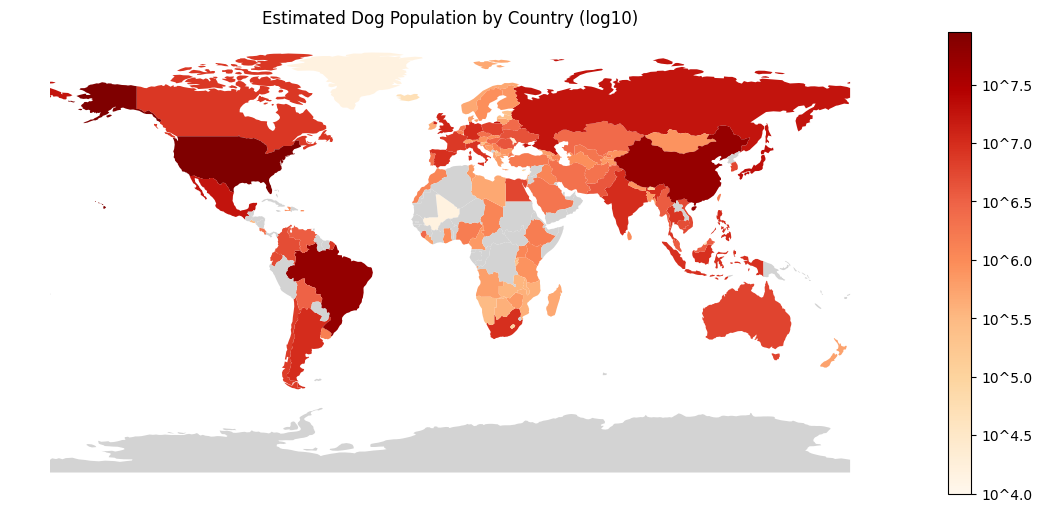

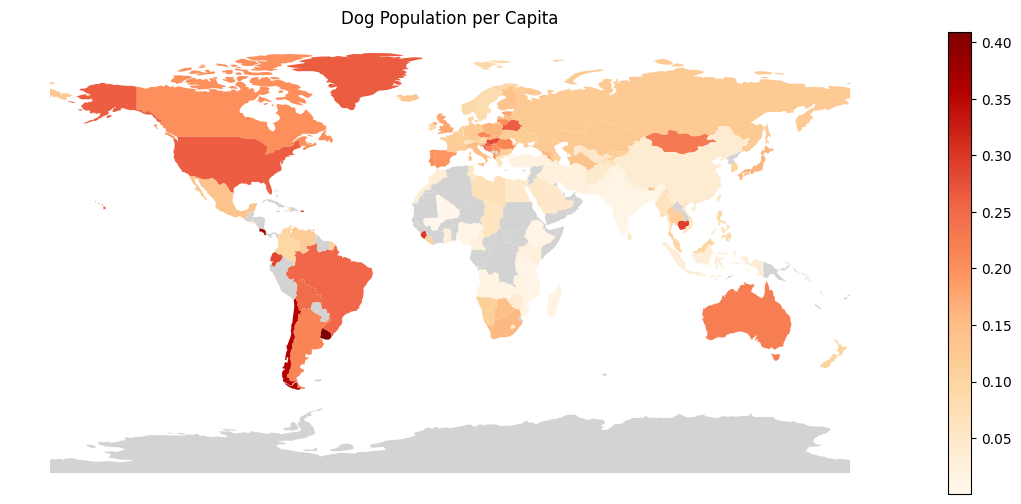

C:\Users\Legion\AppData\Local\Temp\ipykernel_13412\2291266753.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_yticklabels([f"10^{val:,}" for val in tick_values])


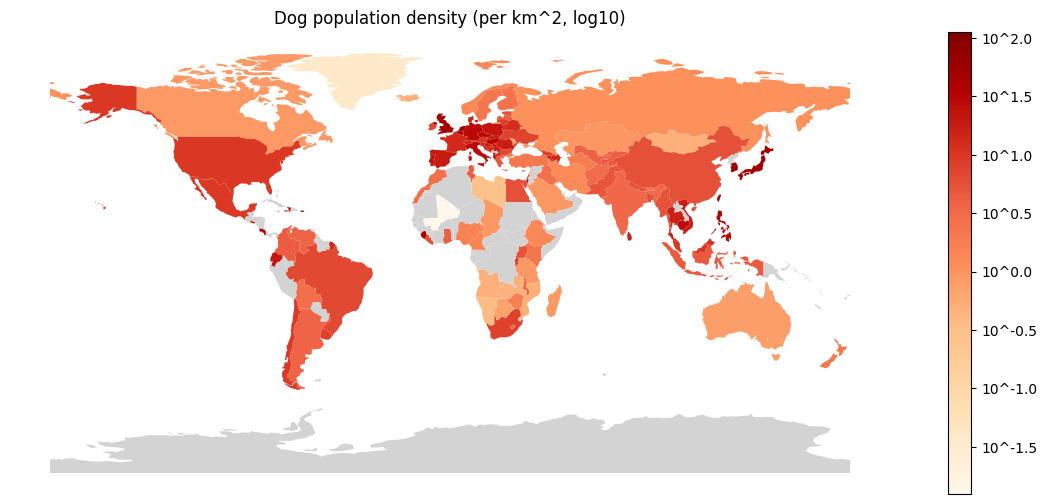

In [5]:
#Funkcia pre vytvorenie geografickej vizualizácie psej populácie v rôznych krajinách sveta
def geo_vytvor_populacia_psov():
    fig, ax = plt.subplots(figsize=(15, 6))
    mapa = merged.plot(
        column='Estimated Dog Population log',
        ax=ax,
        legend=True,
        cmap='OrRd',
        missing_kwds={"color": "lightgrey", "label": "No data"}
    )
    cbar = mapa.get_figure().get_axes()[-1]
    tick_values = cbar.get_yticks()
    cbar.set_yticklabels([f"10^{val:,}" for val in tick_values])

    plt.title("Estimated Dog Population by Country (log10)")
    plt.axis('off')
    plt.show()

#Funkcia pre vytvorenie geografickej vizualizácie populácie psov na jedného obyvateľa v rôznych krajinách sveta
def geo_vytvor_psy_na_hlavu():
    fig, ax = plt.subplots(figsize=(15, 6))
    merged_per_capita.plot(
    column='Dog Population per Capita',
    ax=ax,
    legend=True,
    cmap='OrRd',
    missing_kwds={"color": "lightgrey", "label": "No data"}
    )
    plt.title("Dog Population per Capita")
    plt.axis('off')
    plt.show()

def geo_vytvor_hustotu_psov():
    fig, ax = plt.subplots(figsize=(15, 6))
    mapa = merged_per_capita.plot(
    column='Dog Population Density log',
    ax=ax,
    legend=True,
    cmap='OrRd',
    missing_kwds={"color": "lightgrey", "label": "No data"}
    )

    cbar = mapa.get_figure().get_axes()[-1]
    tick_values = cbar.get_yticks()
    cbar.set_yticklabels([f"10^{val:,}" for val in tick_values])

    plt.title("Dog population density (per km^2, log10)")
    plt.axis('off')
    plt.show()

    
geo_vytvor_populacia_psov()
geo_vytvor_psy_na_hlavu()
geo_vytvor_hustotu_psov()
#HUSTOTA NA KM4

Práca s pôvodnými dátami
---

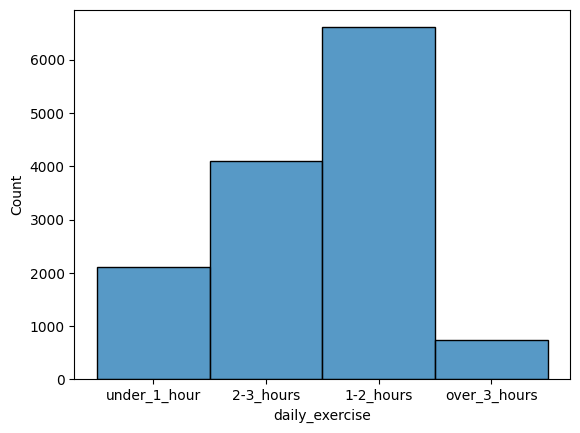

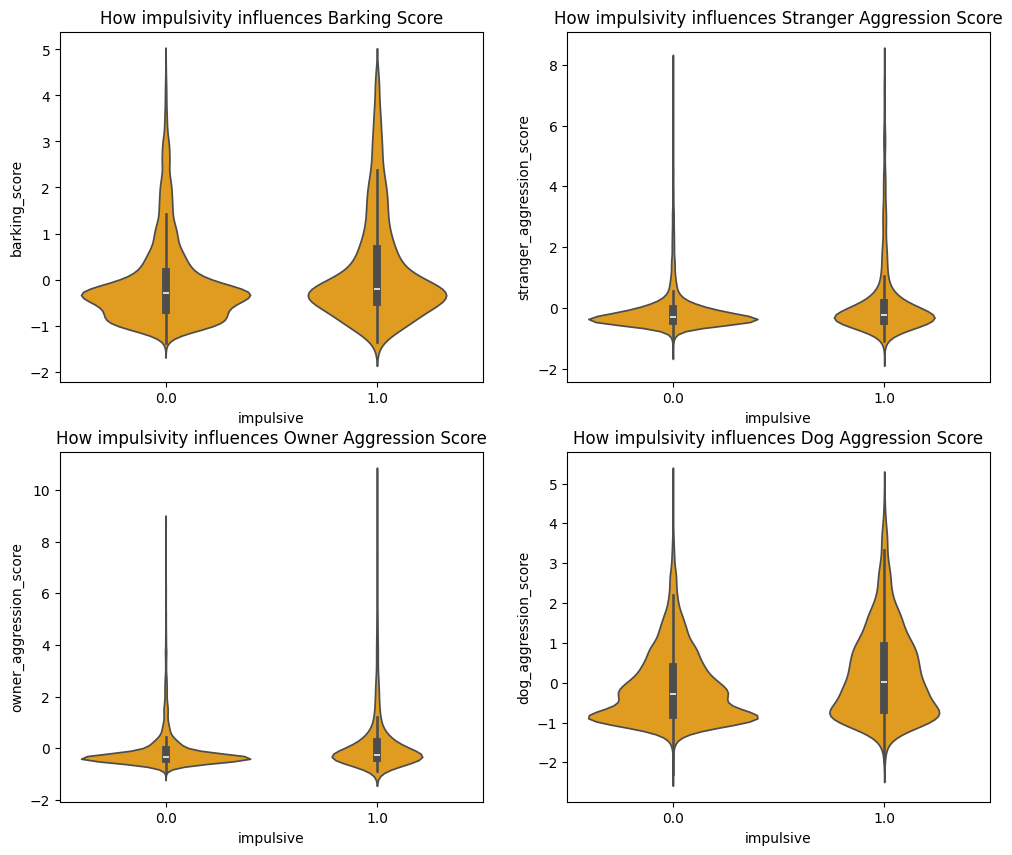

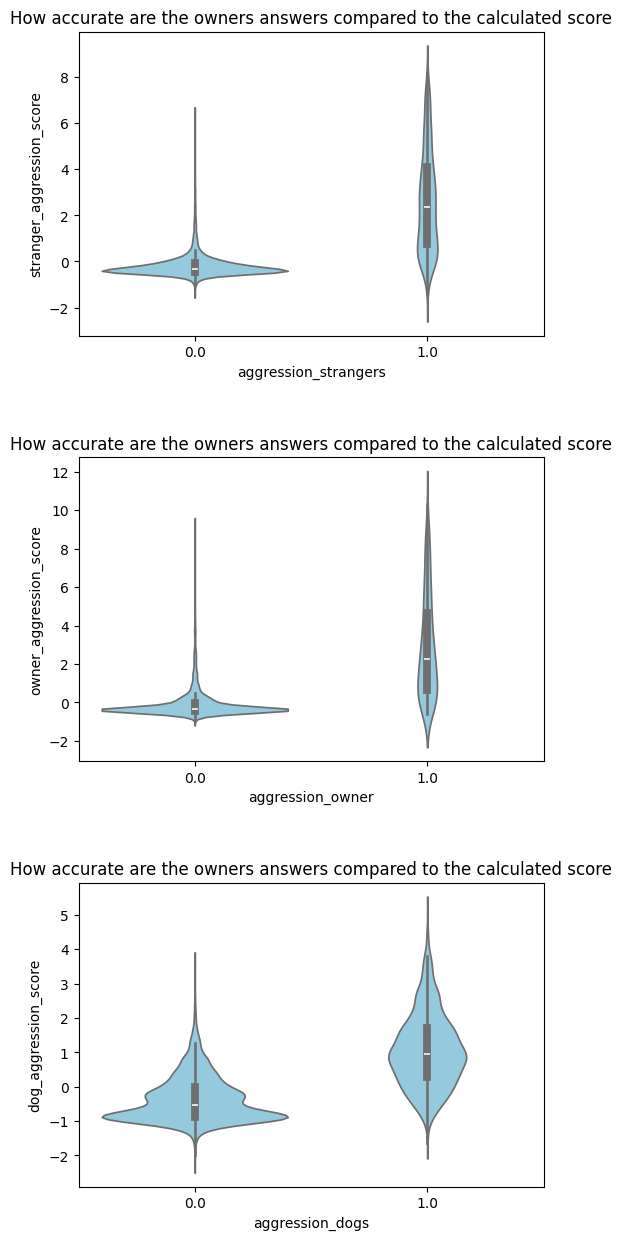

In [84]:
sns.histplot(data = main_data, x = "daily_exercise")
figure, axes = plt.subplots(2,2, figsize = (12,10))
for i, n in enumerate(["barking_score","stranger_aggression_score","owner_aggression_score","dog_aggression_score"]):
    sns.violinplot(data = main_data, x = "impulsive", y = n, ax = axes[i//2][i%2], color = "orange")
    axes[i//2][i%2].set_title("How impulsivity influences " + n.replace("_", " ").title())

empathic_table = main_data[main_data['Empathic'].notna()].copy(deep = True)
empathic_means = pd.DataFrame(empathic_table.groupby("breed_group")["Empathic"].mean())
empathic_means = empathic_means.sort_values("Empathic")
fig = px.bar(empathic_means, y = empathic_means.index, x='Empathic', title = "Empathic by dog breed")
fig.update_layout(
    yaxis=dict(tickmode='linear'),  # Force all ticks to show
    width=1200,
    height=800,
    bargap=0.05
)
fig.show()

figure2, axes2 = plt.subplots(3,1, figsize = (6,15))
sns.violinplot(data = main_data, x = "aggression_strangers", y = "stranger_aggression_score", ax = axes2[0], color = "skyblue")
sns.violinplot(data = main_data, x = "aggression_owner", y = "owner_aggression_score", ax = axes2[1], color = "skyblue")
sns.violinplot(data = main_data, x = "aggression_dogs", y = "dog_aggression_score", ax = axes2[2], color = "skyblue")
for i in range(3):
    axes2[i%3].set_title("How accurate are the owners answers compared to the calculated score")
figure2.subplots_adjust(hspace=0.4)

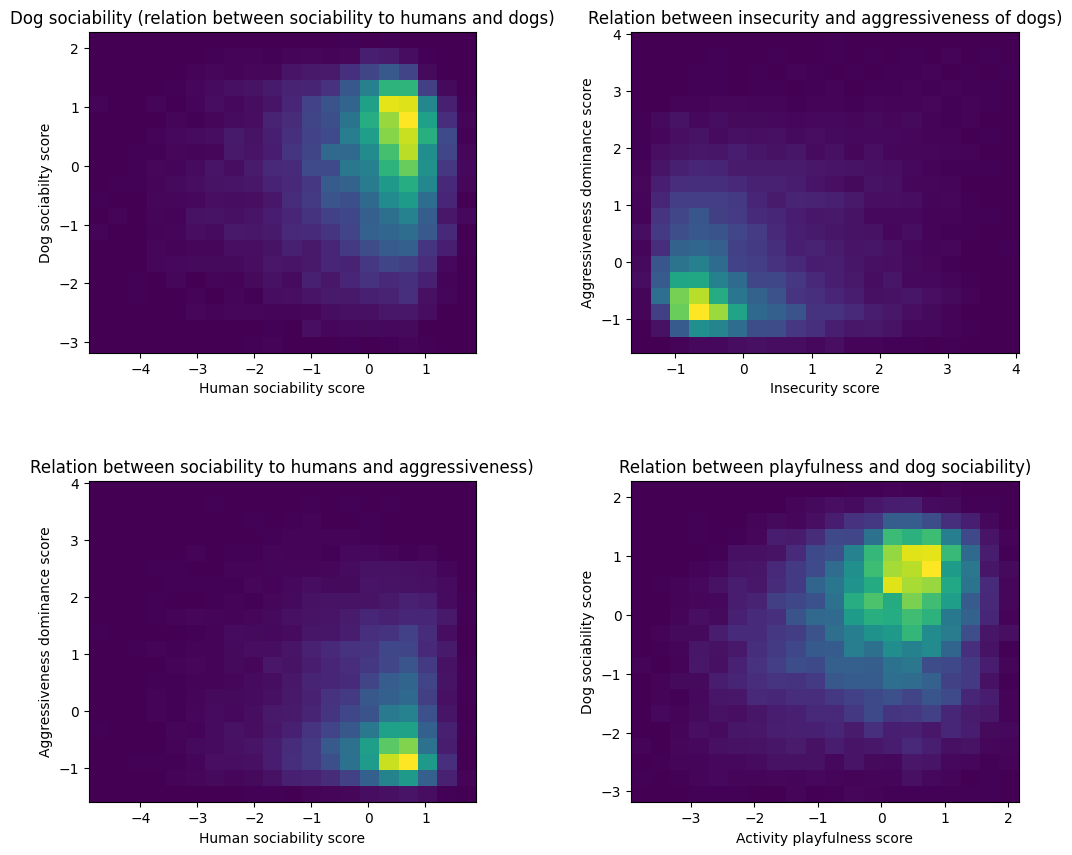

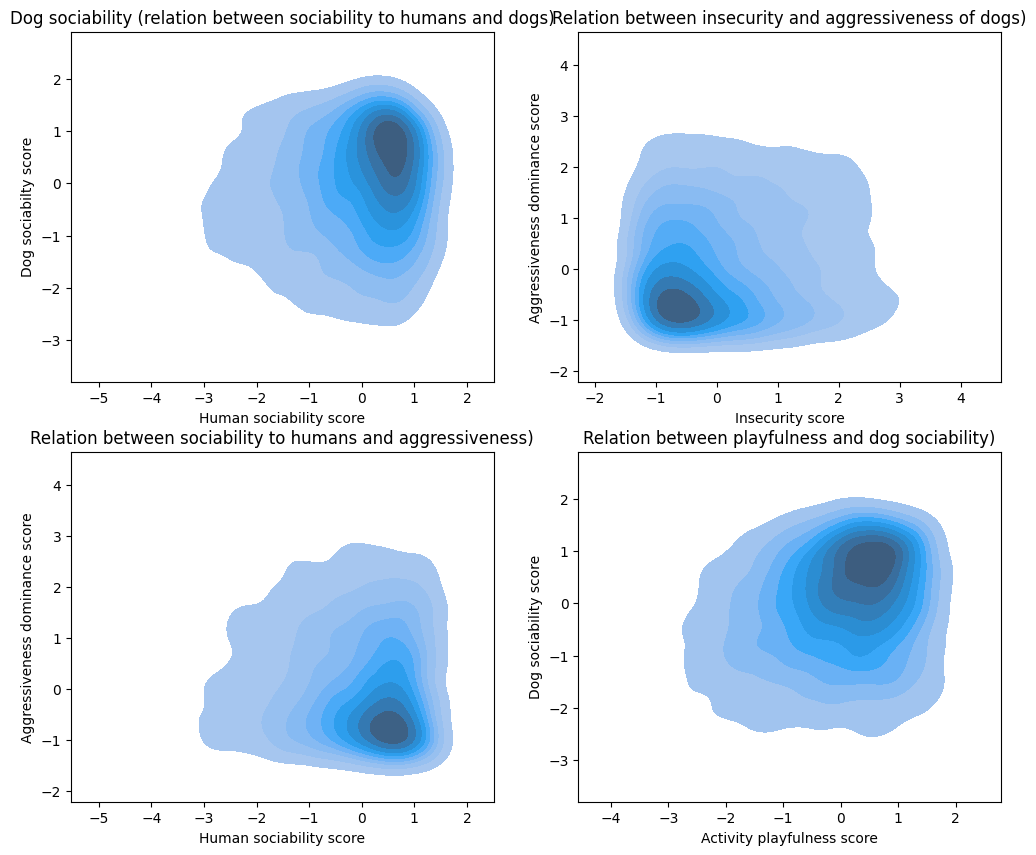

In [62]:
figure, axes = plt.subplots(2, 2, figsize = (12, 10))

axes[0][0].hist2d(main_data["human_sociability_score"].dropna(), main_data["dog_sociability_score"].dropna(), bins = 20)
axes[0][0].set_title("Dog sociability (relation between sociability to humans and dogs)")
axes[0][0].set_xlabel("Human sociability score")
axes[0][0].set_ylabel("Dog sociabilty score")

axes[0][1].hist2d(main_data["insecurity_score"].dropna(), main_data["aggressiveness_dominance_score"].dropna(), bins = 20)
axes[0][1].set_title("Relation between insecurity and aggressiveness of dogs)")
axes[0][1].set_xlabel("Insecurity score")
axes[0][1].set_ylabel("Aggressiveness dominance score")

axes[1][0].hist2d(main_data["human_sociability_score"].dropna(), main_data["aggressiveness_dominance_score"].dropna(), bins = 20)
axes[1][0].set_title("Relation between sociability to humans and aggressiveness)")
axes[1][0].set_xlabel("Human sociability score")
axes[1][0].set_ylabel("Aggressiveness dominance score")

axes[1][1].hist2d(main_data["activity_playfulness_score"].dropna(), main_data["dog_sociability_score"].dropna(), bins = 20)
axes[1][1].set_title("Relation between playfulness and dog sociability)")
axes[1][1].set_xlabel("Activity playfulness score")
axes[1][1].set_ylabel("Dog sociability score")
figure.subplots_adjust(wspace=0.4)



figure2, axes2 = plt.subplots(2,2, figsize = (12, 10))
sns.kdeplot(x = main_data["human_sociability_score"].dropna(), y = main_data["dog_sociability_score"].dropna(), ax = axes2[0][0], fill = True)
axes2[0][0].set_title("Dog sociability (relation between sociability to humans and dogs)")
axes2[0][0].set_xlabel("Human sociability score")
axes2[0][0].set_ylabel("Dog sociabilty score")

sns.kdeplot(x = main_data["insecurity_score"].dropna(), y = main_data["aggressiveness_dominance_score"].dropna(), ax = axes2[0][1], fill = True)
axes2[0][1].set_title("Relation between insecurity and aggressiveness of dogs)")
axes2[0][1].set_xlabel("Insecurity score")
axes2[0][1].set_ylabel("Aggressiveness dominance score")

sns.kdeplot(x = main_data["human_sociability_score"].dropna(), y = main_data["aggressiveness_dominance_score"].dropna(), ax = axes2[1][0], fill = True)
axes2[1][0].set_title("Relation between sociability to humans and aggressiveness)")
axes2[1][0].set_xlabel("Human sociability score")
axes2[1][0].set_ylabel("Aggressiveness dominance score")

sns.kdeplot(x = main_data["activity_playfulness_score"].dropna(), y = main_data["dog_sociability_score"].dropna(), ax = axes2[1][1], fill = True)
axes2[1][1].set_title("Relation between playfulness and dog sociability)")
axes2[1][1].set_xlabel("Activity playfulness score")
axes2[1][1].set_ylabel("Dog sociability score")
figure.subplots_adjust(hspace=0.4)
plt.show()

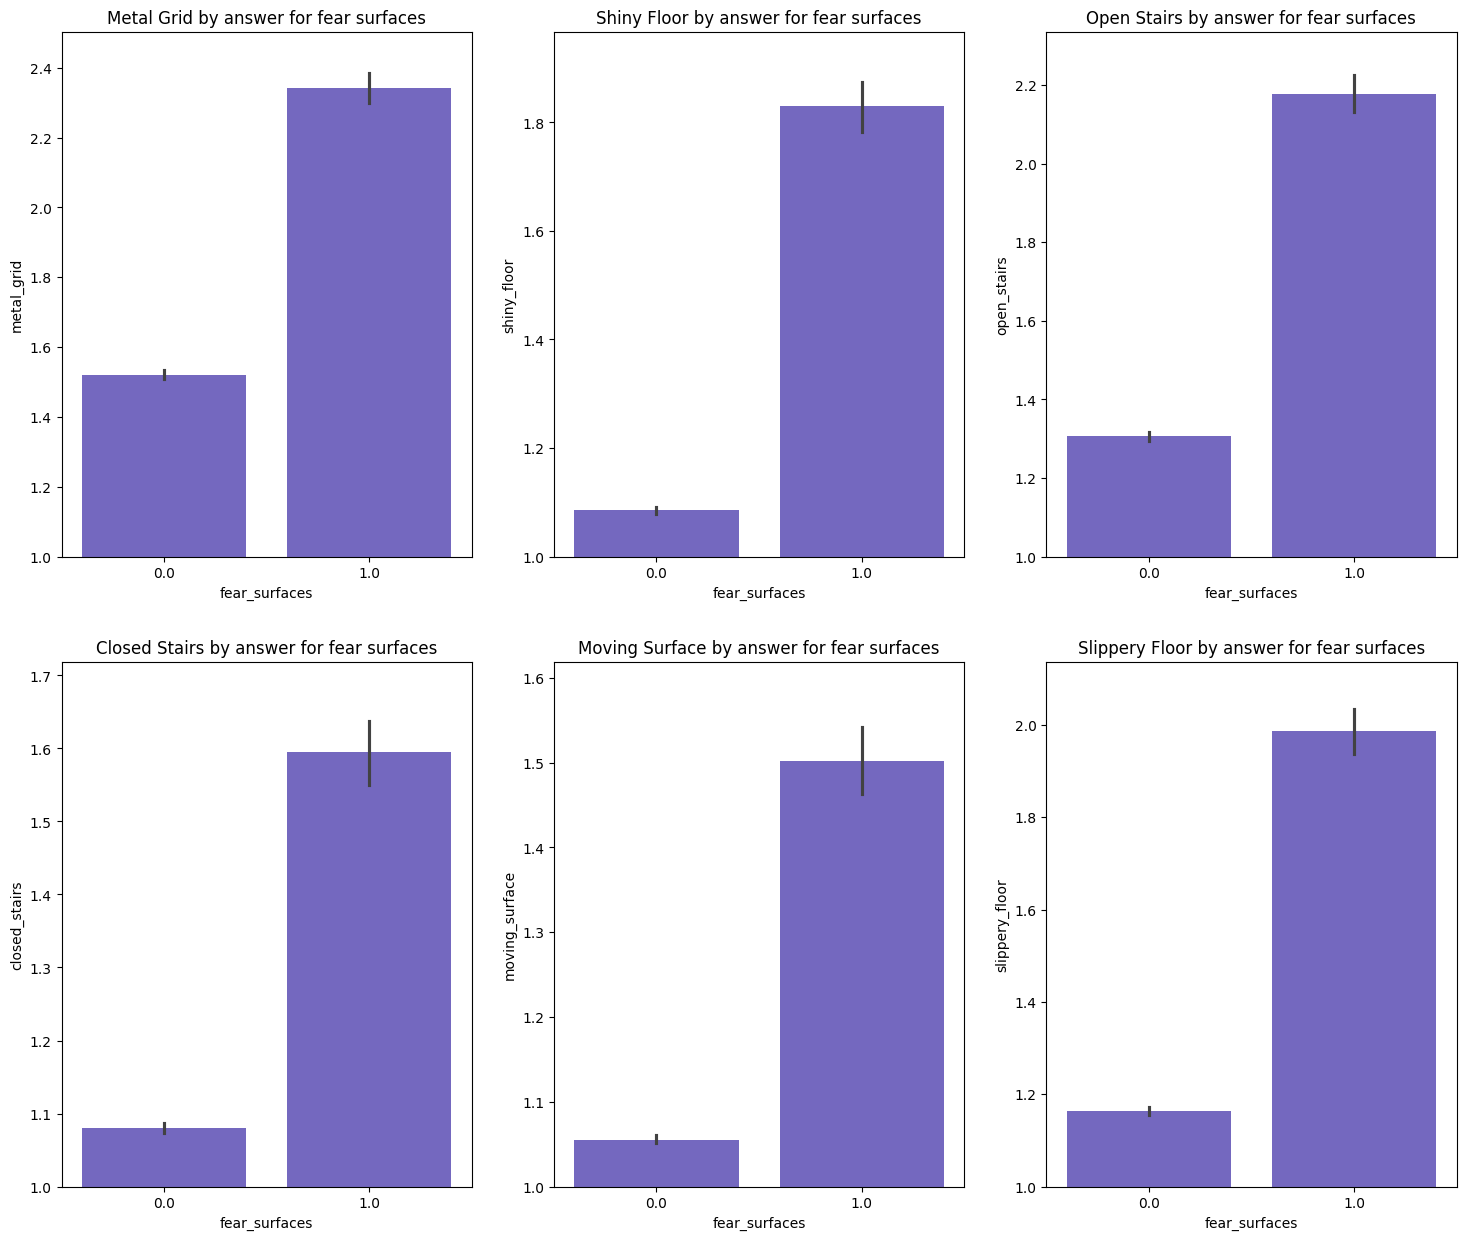

In [73]:

figure, axes = plt.subplots(2,3, figsize = (18,15))
for i, n in enumerate(["metal_grid", "shiny_floor", "open_stairs", "closed_stairs", "moving_surface", "slippery_floor"]):
    sns.barplot(data = main_data, x = "fear_surfaces", y = n, ax = axes[i//3][i%3], color = "slateblue")
    axes[i//3][i%3].set_ylim(bottom = 1)
    axes[i//3][i%3].set_title(n.replace("_", " ").title() + " by answer for fear surfaces")

Príprava: Predstavenie Datasetu // Dataset Bias
---

In [9]:
fig = px.bar(dogs['breed_group'].value_counts().reset_index(), y='breed_group', x='count', title='Pocty jednotlivych plemien v datach', width=1000, height=700, )
fig.update_layout(
    yaxis=dict(tickmode='linear'),  # Force all ticks to show
    width=1200,
    height=800,
    bargap=0.05
)
fig.show()

In [10]:
df = dogs.groupby(by=['sterilization_status','sex'])['dog.id'].count()#.rename(columns={'dog.id':'count'})#.reset_index().set_index(['sex', 'sterilization_status'])

fig = go.Figure(data=[
    go.Bar(name='sterlized', x=['male', 'female'], y=[df['sterilized', 'male'], df['sterilized', 'female']]),
    go.Bar(name='intact', x=['male', 'female'], y=[df['intact', 'male'], df['intact', 'female']])
])
fig.update_layout(barmode='stack', width=700, title='Number of male and female sterilized/intact dogs')
fig.show()

In [11]:
# fig = go.Figure()
# fig.add_trace(go.Histogram(x=dogs.query('sex == "male"')['weight_kg'], name='Male', hovertext=dogs.query('sex == "male"')['dog.id']))
# fig.add_trace(go.Histogram(x=dogs.query('sex == "female"')['weight_kg'], name='Female',  hovertext=dogs.query('sex == "female"')['dog.id']))

# # Overlay both histograms
# fig.update_layout(barmode='overlay', xaxis_title='Weight in KG', title='Weight Histogram by gender')
# # Reduce opacity to see both histograms
# fig.update_traces(opacity=0.75)
# fig.show()
sns.histplot(dogs, x='weight_kg', hue='sex', common_norm=False, stat='probability',hue_order=['female', 'male'], palette=['C3', 'C0'],)
plt.xlabel('Weight [kg]')
pass

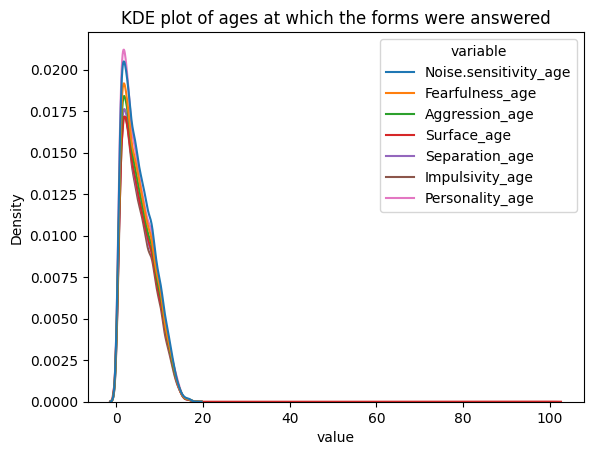

In [12]:
categories = ['Noise.sensitivity_age',
'Fearfulness_age',
'Aggression_age',
'Surface_age',
'Separation_age',
'Impulsivity_age',
'Personality_age']

ages_melt = dogs[categories + ['dog.id']].melt(id_vars='dog.id')

sns.kdeplot(data=ages_melt, x='value', hue='variable')
plt.title('KDE plot of ages at which the forms were answered')
pass

In [13]:
categories = ['Noise.sensitivity_age',
'Fearfulness_age',
'Aggression_age',
'Surface_age',
'Separation_age',
'Impulsivity_age',
'Personality_age']
A = dogs[categories]
B = A[(A.nunique(axis=1) == 1)]
# display(Markdown('<h2>Vsetky riadky, ktore nemaju ani jednu hodnotu NaN a maju rozdielne veky vyplnenia formularov</h2>'))
display(Markdown(f'<h2>{B.shape[0]} záznamov má všetky dotazníky vyplnené v rovnakom veku, alebo nevyplnené</h2>'))
display(B)


<h2>12089 záznamov má všetky dotazníky vyplnené v rovnakom veku, alebo nevyplnené</h2>

,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,Personality_age
2,1.992701,1.992701,1.992701,1.992701,1.992701,1.992701,NaN
3,5.405751,5.405751,5.405751,5.405751,5.405751,5.405751,NaN
6,10.986995,10.986995,10.986995,10.986995,10.986995,10.986995,10.986995
10,8.899233,8.899233,8.899233,8.899233,8.899233,8.899233,8.899233
12,7.362081,7.362081,7.362081,7.362081,7.362081,7.362081,7.362081
...,...,...,...,...,...,...,...
15365,8.559307,8.559307,8.559307,8.559307,8.559307,8.559307,8.559307
15366,4.515599,4.515599,4.515599,4.515599,4.515599,4.515599,4.515599
15367,NaN,NaN,NaN,NaN,NaN,NaN,3.025325
15368,5.315693,NaN,5.315693,5.315693,5.315693,NaN,5.315693


<h2>V niektorych pripadoch su rozdiely az 1 az 2 roky, co by mohlo sposobit mensie vychylky v konzistentnosti dat

,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,Personality_age,delta
15370,18.088980,18.088980,18.088980,100.969900,18.088980,18.088980,NaN,82.880920
1046,3.918401,3.918401,3.918401,3.918401,3.918401,3.918401,6.017208,2.098807
1243,4.705292,4.705292,2.620123,2.620123,2.620123,2.620123,3.187295,2.085169
642,7.323751,7.323751,7.323751,7.323751,7.323751,7.323751,9.408705,2.084954
1174,5.921392,5.921392,3.849945,3.849945,5.921392,3.849945,5.518968,2.071447
1854,5.913180,5.913180,5.913180,5.913180,5.913180,5.913180,7.946168,2.032988
711,3.493498,5.384124,3.493498,3.493498,3.493498,3.493498,4.006024,1.890626
1858,9.351041,9.351041,9.351041,9.351041,9.351041,9.351041,11.241620,1.890579
2728,0.816438,0.816438,0.816438,0.816438,0.816438,2.583942,1.038356,1.767504
2335,10.523640,10.523640,10.523640,10.523640,10.523640,10.523640,12.288270,1.764630


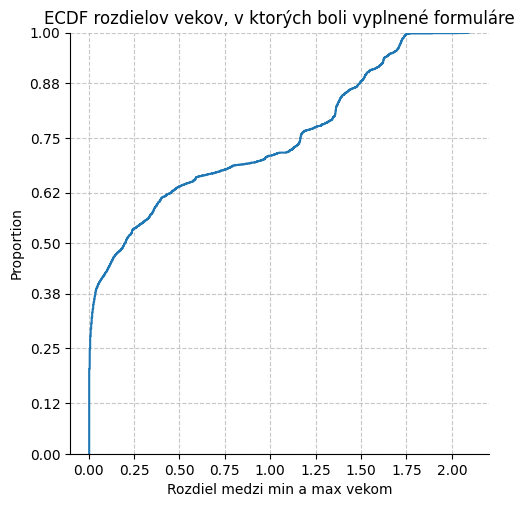

In [14]:
A = dogs[categories]
# B = pd.Series([1,1]) / pd.Series([0, 0]) - pd.Series([1,1]) / pd.Series([0,0]) # Creates NaN series
A = A[A.nunique(axis=1) > 1]
A['delta'] = A.max(axis=1) - A.min(axis=1)
A = A.sort_values(by='delta', ascending=False)
A['mean_age'] = A[categories].mean(axis=1)
display(Markdown('<h2>V niektorych pripadoch su rozdiely az 1 az 2 roky, co by mohlo sposobit mensie vychylky v konzistentnosti dat'))
display(A.head(10))
B = A.iloc[1:, ]
# sns.stripplot(A['delta'], alpha=0.3)
# plt.ylim([0,2.5])
sns.displot(B['delta'], kind='ecdf')
plt.xlabel('Rozdiel medzi min a max vekom')
plt.grid(visible=True, which='both', linestyle='--', alpha=0.7)
plt.title("ECDF rozdielov vekov, v ktorých boli vyplnené formuláre")
plt.xticks(np.linspace(start=0, stop=2, num=9).round(2))
plt.yticks(np.linspace(start=0, stop=1, num=9).round(2))
# sns.displot(B['delta'], kind='ecdf')

plt.subplots()
sns.scatterplot(B, x='mean_age', y='delta', alpha=0.3)
plt.title("Rozdiel vo vekoch psa")

display(Markdown(f'<h2>Počet psov, ktoré majú rozdiel väčší ako 1 a vek menší ako 2 roky = {B.query('delta > 1 and mean_age < 2').shape[0]}'))
pass

c:\Users\Legion\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

c:\Users\Legion\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



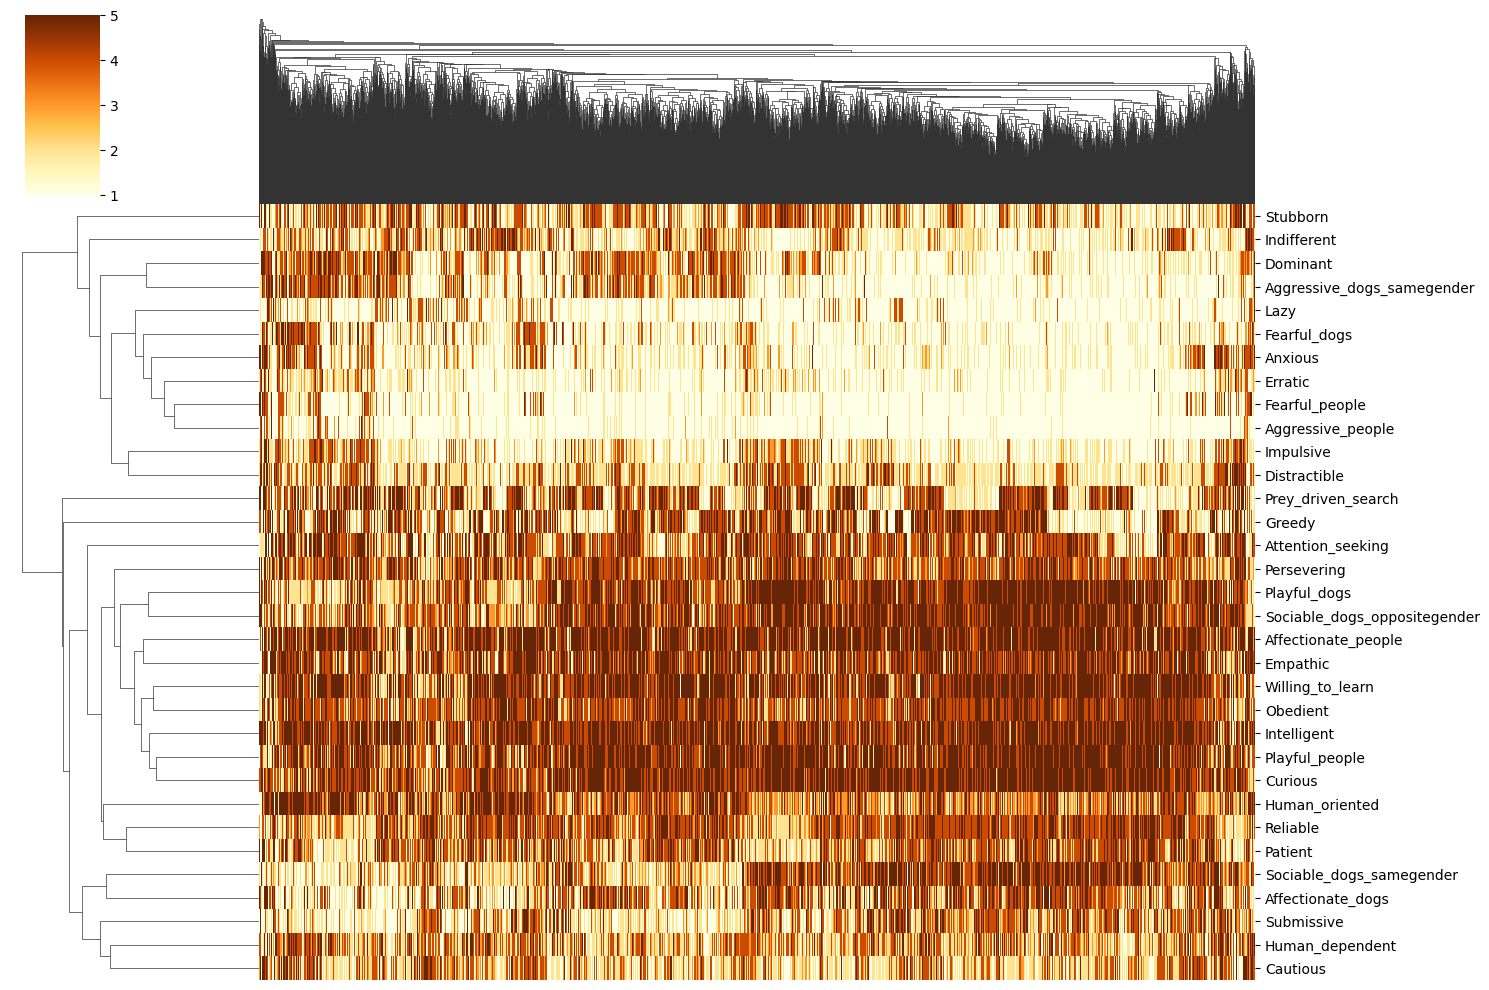

In [15]:
features = """
Willing_to_learn
Playful_dogs
Playful_people
Obedient
Anxious
Lazy
Intelligent
Reliable
Human_dependent
Erratic
Stubborn
Fearful_people
Fearful_dogs
Curious
Impulsive
Affectionate_people
Persevering
Distractible
Submissive
Cautious
Dominant
Patient
Sociable_dogs_samegender
Sociable_dogs_oppositegender
Human_oriented
Prey_driven_search
Empathic
Aggressive_dogs_samegender
Greedy
Attention_seeking
Indifferent
Aggressive_people
Affectionate_dogs
"""
features = features.split()
A = dogs[features].dropna().transpose()
sns.clustermap(A, xticklabels=False, cmap='YlOrBr', figsize=(15,10))

In [16]:
# B = A.transpose().query("Aggressive_people >= 4").transpose()
# display(Markdown("<h1>Dogs with Aggressive_people >= 4</h1>"))
# print('Dog count:', B.shape[1])
# sns.clustermap(B, xticklabels=False, cmap='YlOrBr', figsize=(15,10))

In [17]:
CORR = dogs[features + ['stranger_aggression_score']].corr(method='spearman')
COLS = CORR.columns.to_list()
CORR = CORR.reset_index().melt(id_vars='index', value_vars=COLS)
CORR.columns = ['A', 'B', 'coef']
CORR['size'] = CORR['coef'].abs()
CORR = CORR.query('coef < 1')

fig = px.scatter(CORR, x='A', y='B', size='size', color='coef', width=1200, height=1200, color_continuous_scale=px.colors.diverging.RdBu[::-1], range_color=[-1,1], hover_data={'A':True,'B':True,'coef':True,'size':False}, size_max=25)
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent plot background
    paper_bgcolor='rgba(30,30,30,255)',  # Transparent overall background
    xaxis=dict(showgrid=False, gridcolor='rgba(222, 222, 222, 1)', layer="below traces"),     # Hide x gridlines
    yaxis=dict(showgrid=False, gridcolor='rgba(222, 222, 222, 0.3)', layer="below traces"),
    font=dict(color="white"),
    xaxis_title='',
    yaxis_title='',
)
fig.show()

Zaujímave korelácie:
---
* Anxious a Human dependend
* Playful dogs a Human oriented
* Sociable dogs a Submissive
* Sociable dogs opposite gender a Dominant

# Chovatelia

In [18]:
A = dogs[['dog_breeder', 'leashed_unleashed']].value_counts().reset_index()
A['leashed_unleashed'] = pd.Categorical(A['leashed_unleashed'], ordered=True, categories=['unleashed', 'partly_leashed', 'leashed'])
A = A.sort_values(by='leashed_unleashed')
A['total'] = A.groupby('dog_breeder')['count'].transform('sum')
A['percentage'] = A['count'] / A['total']
fig = px.bar(A, x='leashed_unleashed', y='percentage', color='dog_breeder', barmode='group', title='Leash usage amongst dog owners')
fig.update_layout(
    xaxis_title='',
)
fig.show()


Text(0.5, 1.0, 'Obedience of their dog according to dog owners')

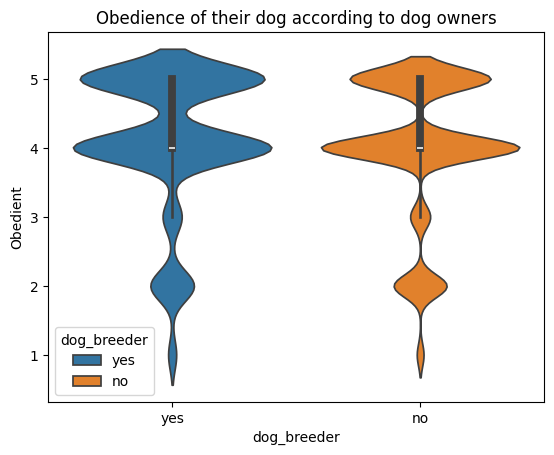

In [19]:
sns.violinplot(dogs, x='dog_breeder', y='Obedient', hue='dog_breeder')
plt.title('Obedience of their dog according to dog owners')

Text(0.5, 1.0, 'Stranger aggression amongst dog owners')

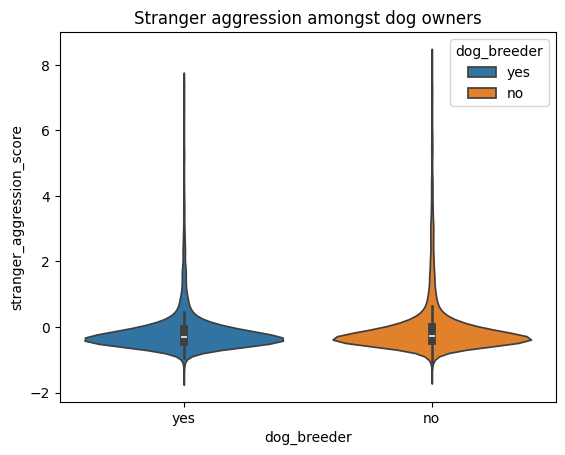

In [20]:
sns.violinplot(dogs, x='dog_breeder', y='stranger_aggression_score', hue='dog_breeder')
plt.title('Stranger aggression amongst dog owners')

Zistili sme
---
* Chovatelia posov pouzivaju menej voditko a su si istejsi, ze ich pes viac poslucha
* V stranger_aggression_score nebol prejaveny rozdiel, cize nie je mensia sanca, ze pes zautoci na cudzieho cloveka, a tym, ze chovatel nepouziva voditko, tak to moze byt nebezpecnejsie

# Agresivita psov

In [21]:
aggressive_columns = ['Aggressive_dogs_samegender', 'Aggressive_people', 'Aggressive_dogs_oppositegender', 'aggressiveness_dominance_score']

means = dogs.groupby('breed_group')[aggressive_columns].mean().reset_index()
means['Aggressive_columns_sum'] = means[aggressive_columns[0]] + means[aggressive_columns[1]] + means[aggressive_columns[2]]
means.sort_values(by='Aggressive_columns_sum', inplace=True)
fig = px.bar(means, y='breed_group', x=aggressive_columns[:-1], title='Dog aggression by breed')
fig.update_layout(
    xaxis_title='aggression',
    yaxis=dict(tickmode='linear'),  # Force all ticks to show
    width=1500,
    height=800,
)
fig.show()

c:\Users\Legion\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

c:\Users\Legion\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



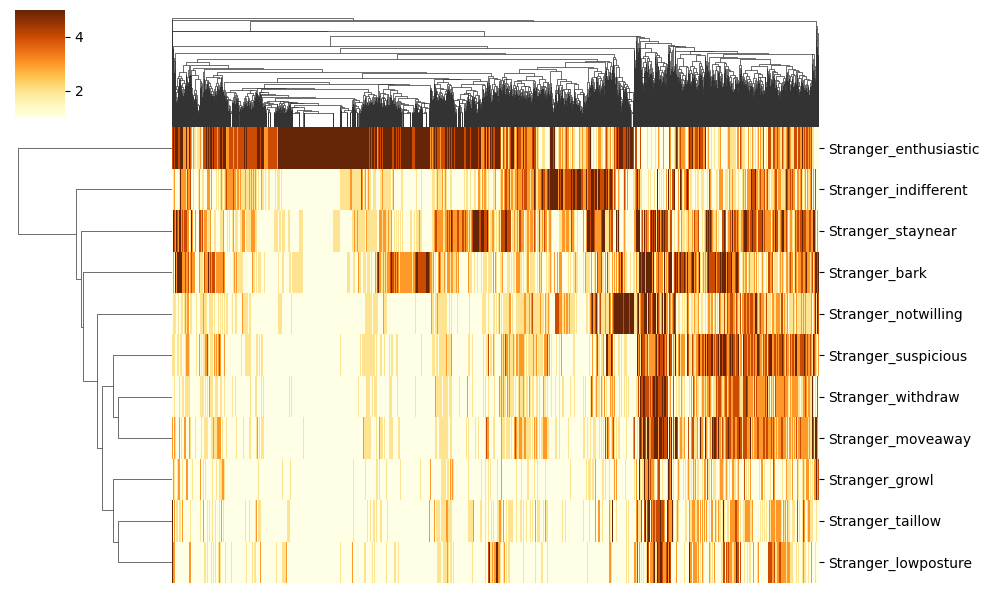

In [22]:
STRANGER_PHOBIAS = ['Stranger_withdraw',
 'Stranger_bark',
 'Stranger_growl',
 'Stranger_taillow',
 'Stranger_staynear',
 'Stranger_notwilling',
 'Stranger_enthusiastic',
 'Stranger_indifferent',
 'Stranger_lowposture',
 'Stranger_moveaway',
 'Stranger_suspicious']

dogs_vs_strangers = dogs[STRANGER_PHOBIAS].dropna().transpose()
sns.clustermap(dogs_vs_strangers, xticklabels=False, cmap='YlOrBr', figsize=(10,6))

In [23]:

soc = dogs[['socialization', 'aggressiveness_dominance_score']]
# soc['aggressivness'] = dogs[aggressive_columns[0]] + dogs[aggressive_columns[1]] + dogs[aggressive_columns[2]]
soc = soc.sort_values(by='socialization').dropna()
soc = soc.rolling(200).mean()
fig = px.line(data_frame=soc, x='socialization', y='aggressiveness_dominance_score', title='Influence of socialization on stranger aggression')
fig.show()

**Preco je v socializacii ludmi taky skok ?**

Počet záznamov so socializáciou 1: 7


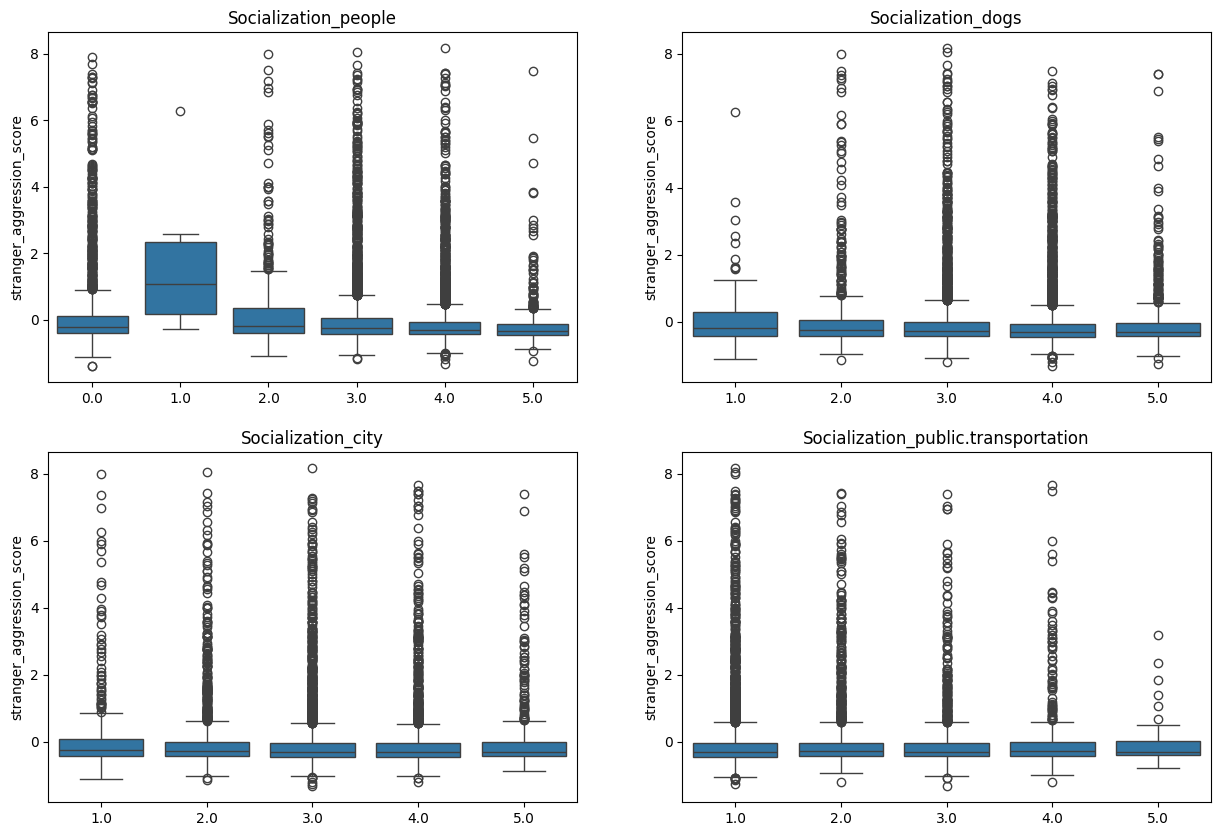

In [24]:
A = dogs.copy()
A['Socialization_people'] = (dogs[['Socialization_men', 'Socialization_women', 'Socialization_children']].sum(axis=1) / 3).apply('round')
# A['Socialization_urban'] = (dogs[['Socialization_city', 'Socialization_public.transportation']].sum(axis=1) / 2).apply('round')
# A['Socialization_public.transportation']
fig, axe = plt.subplots(2,2, figsize=(15,10))
for i,x in enumerate(['Socialization_people', 'Socialization_dogs', 'Socialization_city', 'Socialization_public.transportation']):
    ax = sns.boxplot(A, x=x, y='stranger_aggression_score', ax=axe[i//2,i%2])
    ax.set_title(x)
    ax.set_xlabel("")
display(Markdown('**Preco je v socializacii ludmi taky skok ?**'))
print(f'Počet záznamov so socializáciou 1: {A.query('Socialization_people == 1').shape[0]}')

C:\Users\Legion\AppData\Local\Temp\ipykernel_13412\583718472.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Legion\AppData\Local\Temp\ipykernel_13412\583718472.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



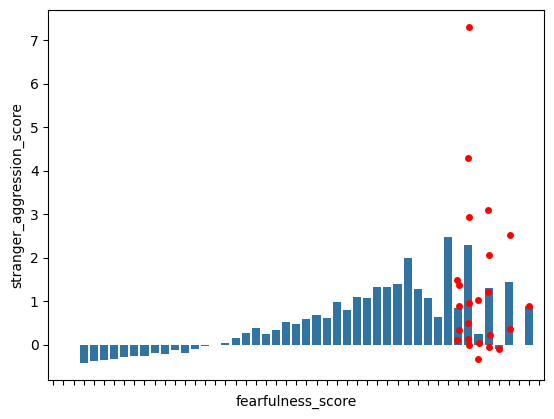

In [25]:
px.scatter(dogs, x='fearfulness_score', y='stranger_aggression_score').show()

A = pd.concat([dogs, pd.cut(dogs['fearfulness_score'], np.linspace(-2, 5, 50)).rename('interval')], axis=1)

B = A.groupby('interval')['stranger_aggression_score'].mean()
axe = sns.barplot(B)

C = pd.concat([A, A.groupby('interval')['stranger_aggression_score'].transform('count').rename('CCC')], axis=1)
axe = sns.stripplot(C.loc[C['CCC'] < 10], x='interval', y='stranger_aggression_score', color='red', ax=axe)
axe.set_xticklabels('')
axe.set_xlabel('fearfulness_score')
pass

C:\Users\Legion\AppData\Local\Temp\ipykernel_13412\2496519374.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



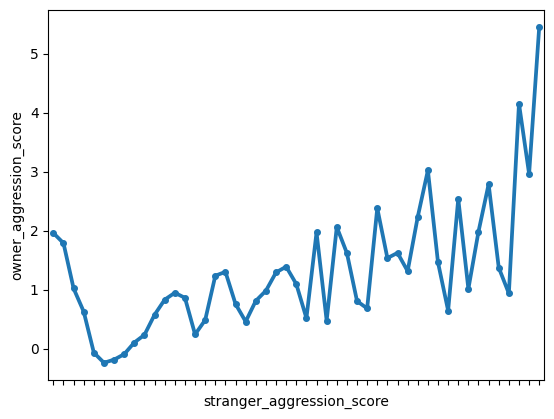

In [26]:
x = 'stranger_aggression_score'
y = 'owner_aggression_score'
px.scatter(dogs, x=x, y=y).show()
A = dogs.copy()
A['interval'] = pd.cut(A['stranger_aggression_score'], np.linspace(-1.5, 8.2, 50))
ax = sns.pointplot(A.groupby('interval')['owner_aggression_score'].mean(), markersize=3)
ax.set_xlabel('stranger_aggression_score')
ax.set_xticklabels('')
pass

Prečo je na začiatku spád ?
---
Hypotéza:  Pes sa hanbi pred cudzimi - na majitelov si dovolia, lebo vedia, ze im nic nespravia, ale od cudzich nevedia co maju cakat.

In [27]:
x = 'stranger_aggression_score'
y = 'owner_aggression_score'
px.scatter(dogs, x=x, y=y, color='Food_growl')

Text(0, 0.5, 'Stranger Aggression')

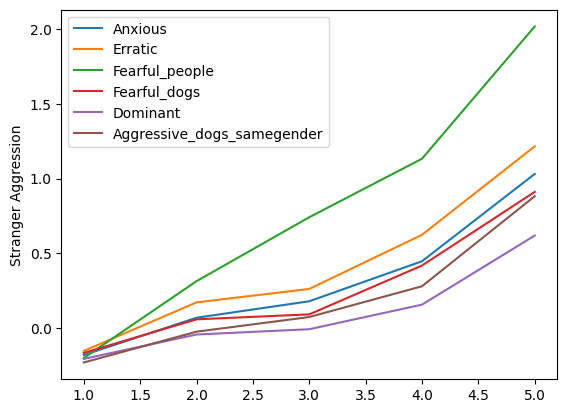

In [28]:
def simpleline(x, y):
    return sns.lineplot(dogs.groupby(x)[y].mean(), label=x)

CORR = dogs[features + ['stranger_aggression_score']].corr(method='spearman')
COLS = CORR.columns.to_list()
CORR = CORR.reset_index().melt(id_vars='index', value_vars=COLS)
CORR.columns = ['A', 'B', 'coef']
CORR['size'] = CORR['coef'].abs()
CORR = CORR.query('coef < 1')

F = CORR.query('A == "stranger_aggression_score" and coef >= 0.2')['B'].to_list()
F.remove('Aggressive_people')
for i,x in enumerate(F):
    simpleline(x, 'stranger_aggression_score')
plt.legend()
plt.xlabel('')
plt.ylabel('Stranger Aggression')

Text(0.5, 0, '')

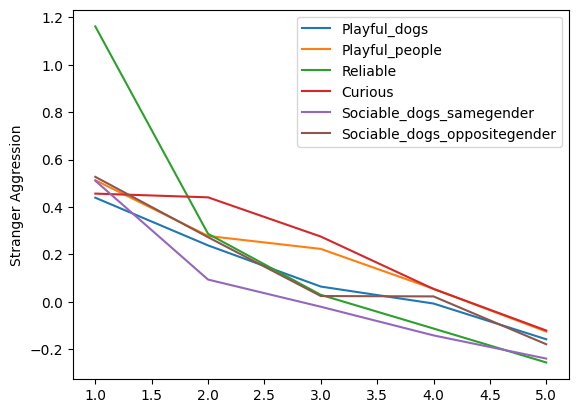

In [29]:
F = CORR.query('A == "stranger_aggression_score" and coef <= -0.2')['B'].to_list()
for i,x in enumerate(F):
    simpleline(x, 'stranger_aggression_score')
plt.legend()
plt.ylabel('Stranger Aggression')
plt.xlabel('')

Text(0.5, 1.0, 'Females')

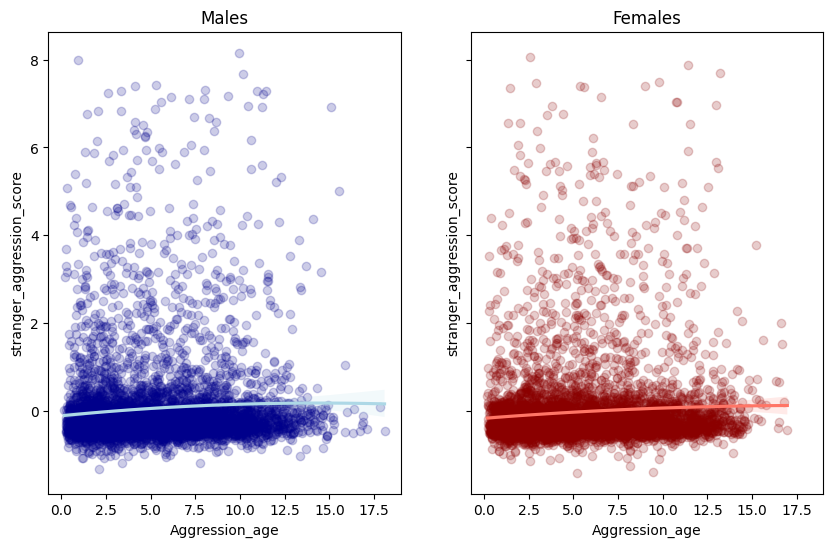

In [30]:
females = dogs.query('sex == "female"')
males = dogs.query('sex == "male"')

# display(dogs.loc[:, ['Aggression_age', 'stranger_aggression_score']])
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,6))
# sns.scatterplot(females, x='Aggression_age', y='stranger_aggression_score', c='darkred', alpha=0.2, ax=axes[0])
sns.regplot(males, x='Aggression_age', y='stranger_aggression_score', color='darkblue', ax=axes[0], line_kws=dict(color='lightblue'), scatter_kws={'alpha':0.2}, order=2)
sns.regplot(females, x='Aggression_age', y='stranger_aggression_score', color='darkred', ax=axes[1], line_kws=dict(color='#ff7566'), scatter_kws={'alpha':0.2}, order=2)
axes[0].set_title('Males')
axes[1].set_title('Females')

# Outlayers

## Pes, ktorý sa dožil 100 rokov

In [31]:
categories = ['Noise.sensitivity_age',
'Fearfulness_age',
'Aggression_age',
'Surface_age',
'Separation_age',
'Impulsivity_age',
'Personality_age']
ages = dogs[categories]
# display(ages.describe())
display(dogs.query('Surface_age > 100'))#.transpose().rename(columns={15370: 'Pes, ktorý sa dožil 100 rokov'}))

,dog.id,breed_group,sex,sterilization_status,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,...,Vas_8_excessive,Vas_9_alwaysplay,Vas_10_complicatedtasks,Vas_11_reacthastily,Vas_12_easilydistracted,Vas_13_cannotwait,impulsive,impulsiveness_disturbes,inattention_score,impulsivity_score
15370,15371,Teacup_dogs,male,intact,18.08898,18.08898,18.08898,100.9699,18.08898,18.08898,...,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,-0.41932,-0.66403


## Pes s vahou >100kg

In [32]:
display(dogs.query('weight_kg > 100'))

,dog.id,breed_group,sex,sterilization_status,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,...,Vas_8_excessive,Vas_9_alwaysplay,Vas_10_complicatedtasks,Vas_11_reacthastily,Vas_12_easilydistracted,Vas_13_cannotwait,impulsive,impulsiveness_disturbes,inattention_score,impulsivity_score
10796,10797,Mastiff_type_dogs,male,intact,5.38932,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
A = dogs.set_index('dog.id').query('Aggressive_people >= 4 and Affectionate_people >= 4')[['Aggressive_people', 'Affectionate_people']]
n = A.shape[0]
display(Markdown(f'<h2>{n} ľudí vyplnilo, že ich pes je 4 a viac agresívny voči ľuďom a zároveň 4 a viac prítulný k ľudom</h2>'))

<h2>382 ľudí vyplnilo, že ich pes je 4 a viac agresívny voči ľuďom a zároveň 4 a viac prítulný k ľudom</h2>